# Import Library

In [1]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Tesis/oil_production.csv")

In [5]:
data.dtypes

date               object
HCO_A_06          float64
HCO_PC_1          float64
HCO_PC_10           int64
HCO_PC_3          float64
HCO_PC_5          float64
LON_BKP             int64
LON_LB            float64
LON_PMT           float64
LON_PTN           float64
LON_PUN             int64
LON_TOT_BGK_BL    float64
LOS_KOTA          float64
LOS_MS_1            int64
LOS_MS_2          float64
LOS_MS_3            int64
LOS_MS_4            int64
LOS_MS_5          float64
LOS_MS_6            int64
NLO_INT             int64
TOT_PROD          float64
dtype: object

In [6]:
data.head()

,date,HCO_A_06,HCO_PC_1,HCO_PC_10,HCO_PC_3,HCO_PC_5,LON_BKP,LON_LB,LON_PMT,LON_PTN,...,LON_TOT_BGK_BL,LOS_KOTA,LOS_MS_1,LOS_MS_2,LOS_MS_3,LOS_MS_4,LOS_MS_5,LOS_MS_6,NLO_INT,TOT_PROD
0,1/1/2016,11377.0,15693.0,32532,15306.0,40333.0,11400,2706.3,6810.0,5816.0,...,39098.3,26007.0,13455,6517.0,9163,6696,7365.0,4935,486,261672.0
1,1/2/2016,11110.0,15878.0,32221,15516.0,40351.0,11480,2727.5,6802.0,5800.0,...,51838.7,25571.0,13320,6720.0,9030,6610,7281.0,4914,501,279469.0
2,1/3/2016,10004.0,15699.0,32055,15349.0,40546.0,11433,2734.7,6762.0,5872.0,...,61955.0,26002.0,13219,6742.0,9081,6551,7171.0,4843,495,295497.0
3,1/4/2016,10141.0,15940.0,31690,15506.0,40714.0,11527,2785.6,6743.0,5970.0,...,48715.7,26307.0,13239,6634.0,9127,6592,8044.0,5145,477,273198.0
4,1/5/2016,10091.0,15934.0,31882,15671.0,41003.2,11610,2796.4,6638.0,6025.0,...,51103.8,27749.0,13234,6653.0,9107,6635,7977.0,5084,478,284080.0


In [7]:
data.isnull().sum()

date                0
HCO_A_06            0
HCO_PC_1            0
HCO_PC_10           0
HCO_PC_3            0
HCO_PC_5            0
LON_BKP             0
LON_LB              0
LON_PMT             0
LON_PTN             0
LON_PUN             0
LON_TOT_BGK_BL    244
LOS_KOTA            0
LOS_MS_1            0
LOS_MS_2            0
LOS_MS_3            0
LOS_MS_4            0
LOS_MS_5            0
LOS_MS_6            0
NLO_INT             0
TOT_PROD            0
dtype: int64

In [8]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

date              datetime64[ns]
HCO_A_06                 float64
HCO_PC_1                 float64
HCO_PC_10                  int64
HCO_PC_3                 float64
HCO_PC_5                 float64
LON_BKP                    int64
LON_LB                   float64
LON_PMT                  float64
LON_PTN                  float64
LON_PUN                    int64
LON_TOT_BGK_BL           float64
LOS_KOTA                 float64
LOS_MS_1                   int64
LOS_MS_2                 float64
LOS_MS_3                   int64
LOS_MS_4                   int64
LOS_MS_5                 float64
LOS_MS_6                   int64
NLO_INT                    int64
TOT_PROD                 float64
dtype: object

In [9]:
data.head()

,date,HCO_A_06,HCO_PC_1,HCO_PC_10,HCO_PC_3,HCO_PC_5,LON_BKP,LON_LB,LON_PMT,LON_PTN,...,LON_TOT_BGK_BL,LOS_KOTA,LOS_MS_1,LOS_MS_2,LOS_MS_3,LOS_MS_4,LOS_MS_5,LOS_MS_6,NLO_INT,TOT_PROD
0,2016-01-01,11377.0,15693.0,32532,15306.0,40333.0,11400,2706.3,6810.0,5816.0,...,39098.3,26007.0,13455,6517.0,9163,6696,7365.0,4935,486,261672.0
1,2016-01-02,11110.0,15878.0,32221,15516.0,40351.0,11480,2727.5,6802.0,5800.0,...,51838.7,25571.0,13320,6720.0,9030,6610,7281.0,4914,501,279469.0
2,2016-01-03,10004.0,15699.0,32055,15349.0,40546.0,11433,2734.7,6762.0,5872.0,...,61955.0,26002.0,13219,6742.0,9081,6551,7171.0,4843,495,295497.0
3,2016-01-04,10141.0,15940.0,31690,15506.0,40714.0,11527,2785.6,6743.0,5970.0,...,48715.7,26307.0,13239,6634.0,9127,6592,8044.0,5145,477,273198.0
4,2016-01-05,10091.0,15934.0,31882,15671.0,41003.2,11610,2796.4,6638.0,6025.0,...,51103.8,27749.0,13234,6653.0,9107,6635,7977.0,5084,478,284080.0


<AxesSubplot:>

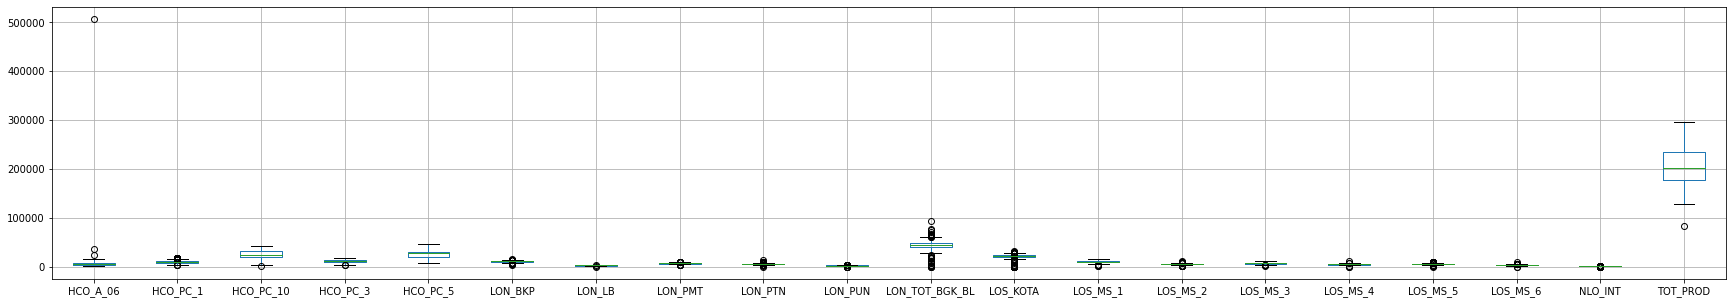

In [10]:
data.boxplot(figsize=(30,5))

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HCO_A_06,2539.0,5534.138243,10422.499120,166.0,2814.00,5150.0,8103.50,506165.0
HCO_PC_1,2539.0,9680.138637,2592.954128,2580.0,7974.50,9304.0,10812.50,18220.0
HCO_PC_10,2539.0,26158.317842,6283.719315,1021.0,20478.00,24519.0,32162.00,42502.0
HCO_PC_3,2539.0,10705.899646,2543.511028,2785.0,9006.00,10464.0,12644.50,16934.0
HCO_PC_5,2539.0,25873.558488,6115.519580,7305.0,19550.50,26896.0,30564.90,46356.0
LON_BKP,2539.0,10391.111067,1271.763651,3405.0,9445.00,10520.0,11181.50,14445.0
LON_LB,2539.0,2414.902284,543.675301,0.5,2001.50,2462.1,2812.95,4140.9
LON_PMT,2539.0,6773.580937,963.526170,2382.0,6124.50,6718.0,7470.00,10024.0
LON_PTN,2539.0,5799.997479,828.476958,0.0,5298.00,5750.0,6135.00,14185.0
LON_PUN,2539.0,1864.326900,378.671305,0.0,1588.50,1761.0,2159.00,3820.0


<AxesSubplot:>

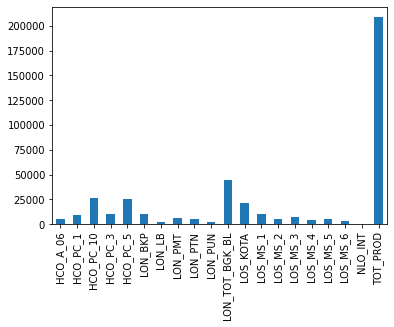

In [12]:
stats = data.describe().T
desc_stats = stats ['mean']
desc_stats.plot.bar()

In [13]:
data.set_index('date', inplace=True)

In [14]:
data.corr()

,HCO_A_06,HCO_PC_1,HCO_PC_10,HCO_PC_3,HCO_PC_5,LON_BKP,LON_LB,LON_PMT,LON_PTN,LON_PUN,LON_TOT_BGK_BL,LOS_KOTA,LOS_MS_1,LOS_MS_2,LOS_MS_3,LOS_MS_4,LOS_MS_5,LOS_MS_6,NLO_INT,TOT_PROD
HCO_A_06,1.000000,0.217053,0.253352,0.217164,0.248372,0.219330,-0.163843,0.088297,-0.001799,0.162609,0.161094,0.075892,0.220171,0.204608,0.229806,0.170729,0.185676,0.225067,-0.041901,0.247026
HCO_PC_1,0.217053,1.000000,0.829805,0.690718,0.810731,0.545190,-0.365447,0.141836,0.104870,0.621504,0.564646,0.456230,0.809412,0.796641,0.839209,0.754886,0.811576,0.859418,-0.081524,0.900755
HCO_PC_10,0.253352,0.829805,1.000000,0.693884,0.799594,0.666850,-0.551384,0.217579,0.162705,0.629707,0.615769,0.373743,0.864070,0.811336,0.840348,0.763962,0.779893,0.814307,0.059676,0.921807
HCO_PC_3,0.217164,0.690718,0.693884,1.000000,0.758960,0.509389,-0.245889,0.292163,-0.065698,0.371085,0.457146,0.232849,0.620995,0.588528,0.645867,0.428784,0.558423,0.783178,-0.266566,0.730882
HCO_PC_5,0.248372,0.810731,0.799594,0.758960,1.000000,0.757457,-0.441916,0.451535,0.092236,0.473042,0.560798,0.309750,0.762352,0.752851,0.790519,0.606778,0.667509,0.864148,-0.238482,0.888786
LON_BKP,0.219330,0.545190,0.666850,0.509389,0.757457,1.000000,-0.514708,0.549658,0.031369,0.401090,0.482272,0.168404,0.619700,0.642969,0.661944,0.507519,0.486898,0.612407,-0.122609,0.702155
LON_LB,-0.163843,-0.365447,-0.551384,-0.245889,-0.441916,-0.514708,1.000000,-0.200411,-0.013458,-0.378264,-0.350221,-0.145420,-0.517790,-0.521824,-0.517556,-0.512346,-0.493041,-0.361079,-0.027103,-0.508460
LON_PMT,0.088297,0.141836,0.217579,0.292163,0.451535,0.549658,-0.200411,1.000000,-0.065758,-0.115930,0.198082,-0.066161,0.156768,0.227187,0.228124,0.021479,0.057686,0.281432,-0.322786,0.281565
LON_PTN,-0.001799,0.104870,0.162705,-0.065698,0.092236,0.031369,-0.013458,-0.065758,1.000000,0.217320,0.148927,0.211148,0.252215,0.144932,0.102442,0.268426,0.234253,0.129513,0.246299,0.202868
LON_PUN,0.162609,0.621504,0.629707,0.371085,0.473042,0.401090,-0.378264,-0.115930,0.217320,1.000000,0.436926,0.386288,0.641189,0.594294,0.654199,0.664837,0.663539,0.528796,0.273930,0.637722


<AxesSubplot:>

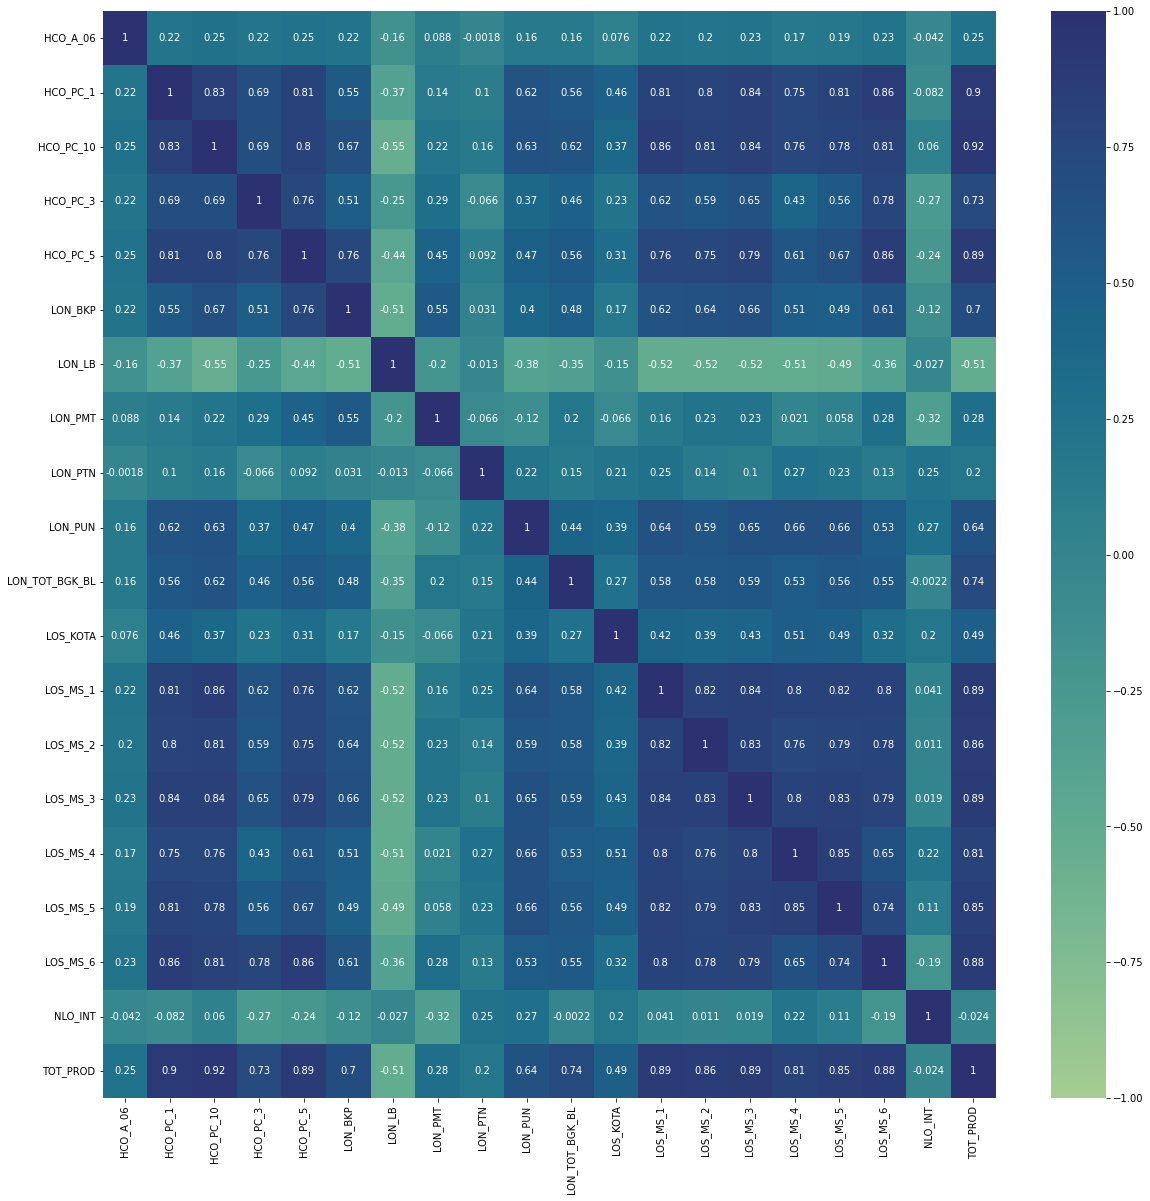

In [15]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),vmin = -1, vmax = 1, annot = True, cmap="crest")

In [16]:
y = data['TOT_PROD']
y


date
2016-01-01    261672.00
2016-01-02    279469.00
2016-01-03    295497.00
2016-01-04    273198.00
2016-01-05    284080.00
                ...    
2022-12-09    161032.00
2022-12-10    179321.00
2022-12-11    165433.00
2022-12-12    290095.09
2022-12-13    218847.79
Name: TOT_PROD, Length: 2539, dtype: float64

In [17]:
X = data.drop(columns='TOT_PROD')
X

,HCO_A_06,HCO_PC_1,HCO_PC_10,HCO_PC_3,HCO_PC_5,LON_BKP,LON_LB,LON_PMT,LON_PTN,LON_PUN,LON_TOT_BGK_BL,LOS_KOTA,LOS_MS_1,LOS_MS_2,LOS_MS_3,LOS_MS_4,LOS_MS_5,LOS_MS_6,NLO_INT
date,,,,,,,,,,,,,,,,,,,
2016-01-01,11377.0,15693.0,32532,15306.0,40333.0,11400,2706.3,6810.0,5816.0,2245,39098.3,26007.0,13455,6517.0,9163,6696,7365.0,4935,486
2016-01-02,11110.0,15878.0,32221,15516.0,40351.0,11480,2727.5,6802.0,5800.0,2542,51838.7,25571.0,13320,6720.0,9030,6610,7281.0,4914,501
2016-01-03,10004.0,15699.0,32055,15349.0,40546.0,11433,2734.7,6762.0,5872.0,2354,61955.0,26002.0,13219,6742.0,9081,6551,7171.0,4843,495
2016-01-04,10141.0,15940.0,31690,15506.0,40714.0,11527,2785.6,6743.0,5970.0,2356,48715.7,26307.0,13239,6634.0,9127,6592,8044.0,5145,477
2016-01-05,10091.0,15934.0,31882,15671.0,41003.2,11610,2796.4,6638.0,6025.0,2379,51103.8,27749.0,13234,6653.0,9107,6635,7977.0,5084,478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09,565.0,5582.0,9225,5592.0,15250.0,8652,2361.7,5665.0,7995.0,0,36053.2,21763.0,7640,3742.0,3728,2938,4214.0,2162,98
2022-12-10,585.0,5593.0,20724,5932.0,15280.0,8825,2354.5,5632.0,8335.0,0,39806.1,21966.0,8928,4138.0,7568,4960,4618.0,2228,411
2022-12-11,815.0,5525.0,20733,6182.0,15204.0,9235,2367.9,5673.0,8700.0,0,40711.5,21904.0,9804,4032.0,5912,5002,4644.0,2140,551


# Regression Sweep of Various Method for Multivariate Model



In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [19]:
from lazypredict.Supervised import LazyRegressor

In [20]:
clf = LazyRegressor(verbose=0, ignore_warnings=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [03:15<00:00,  4.66s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsCV,0.99,0.99,3800.14,0.10
LarsCV,0.99,0.99,3800.14,0.12
LassoCV,0.99,0.99,3800.44,0.21
LassoLarsIC,0.99,0.99,3800.94,0.07
RidgeCV,0.99,0.99,3801.35,0.02
BayesianRidge,0.99,0.99,3805.58,0.04
Ridge,0.99,0.99,3806.39,0.01
Lasso,0.99,0.99,3806.87,0.04
LassoLars,0.99,0.99,3806.88,0.04


In [21]:
df = data.copy()
df.dtypes

HCO_A_06          float64
HCO_PC_1          float64
HCO_PC_10           int64
HCO_PC_3          float64
HCO_PC_5          float64
LON_BKP             int64
LON_LB            float64
LON_PMT           float64
LON_PTN           float64
LON_PUN             int64
LON_TOT_BGK_BL    float64
LOS_KOTA          float64
LOS_MS_1            int64
LOS_MS_2          float64
LOS_MS_3            int64
LOS_MS_4            int64
LOS_MS_5          float64
LOS_MS_6            int64
NLO_INT             int64
TOT_PROD          float64
dtype: object

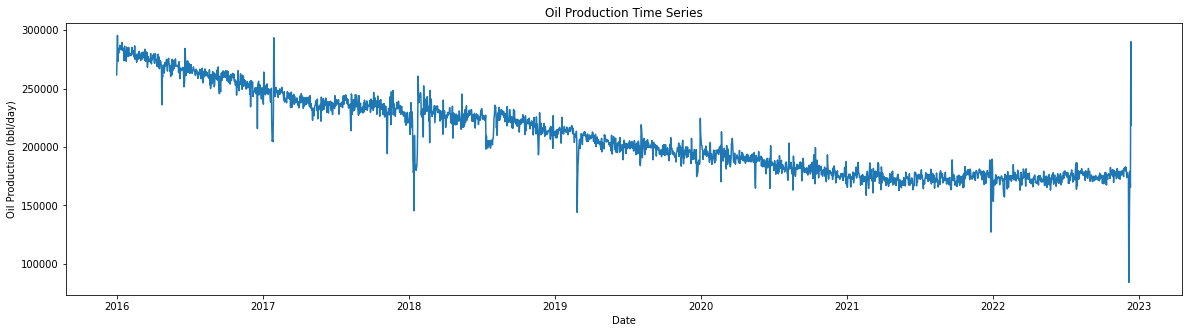

In [22]:
# Plot the oil production data
plt.figure(figsize=(20, 5))
plt.plot(df['TOT_PROD'])
plt.xlabel('Date')
plt.ylabel('Oil Production (bbl/day)')
plt.title('Oil Production Time Series')
plt.show()

In [23]:
from pylab import rcParams
import statsmodels.api as sm

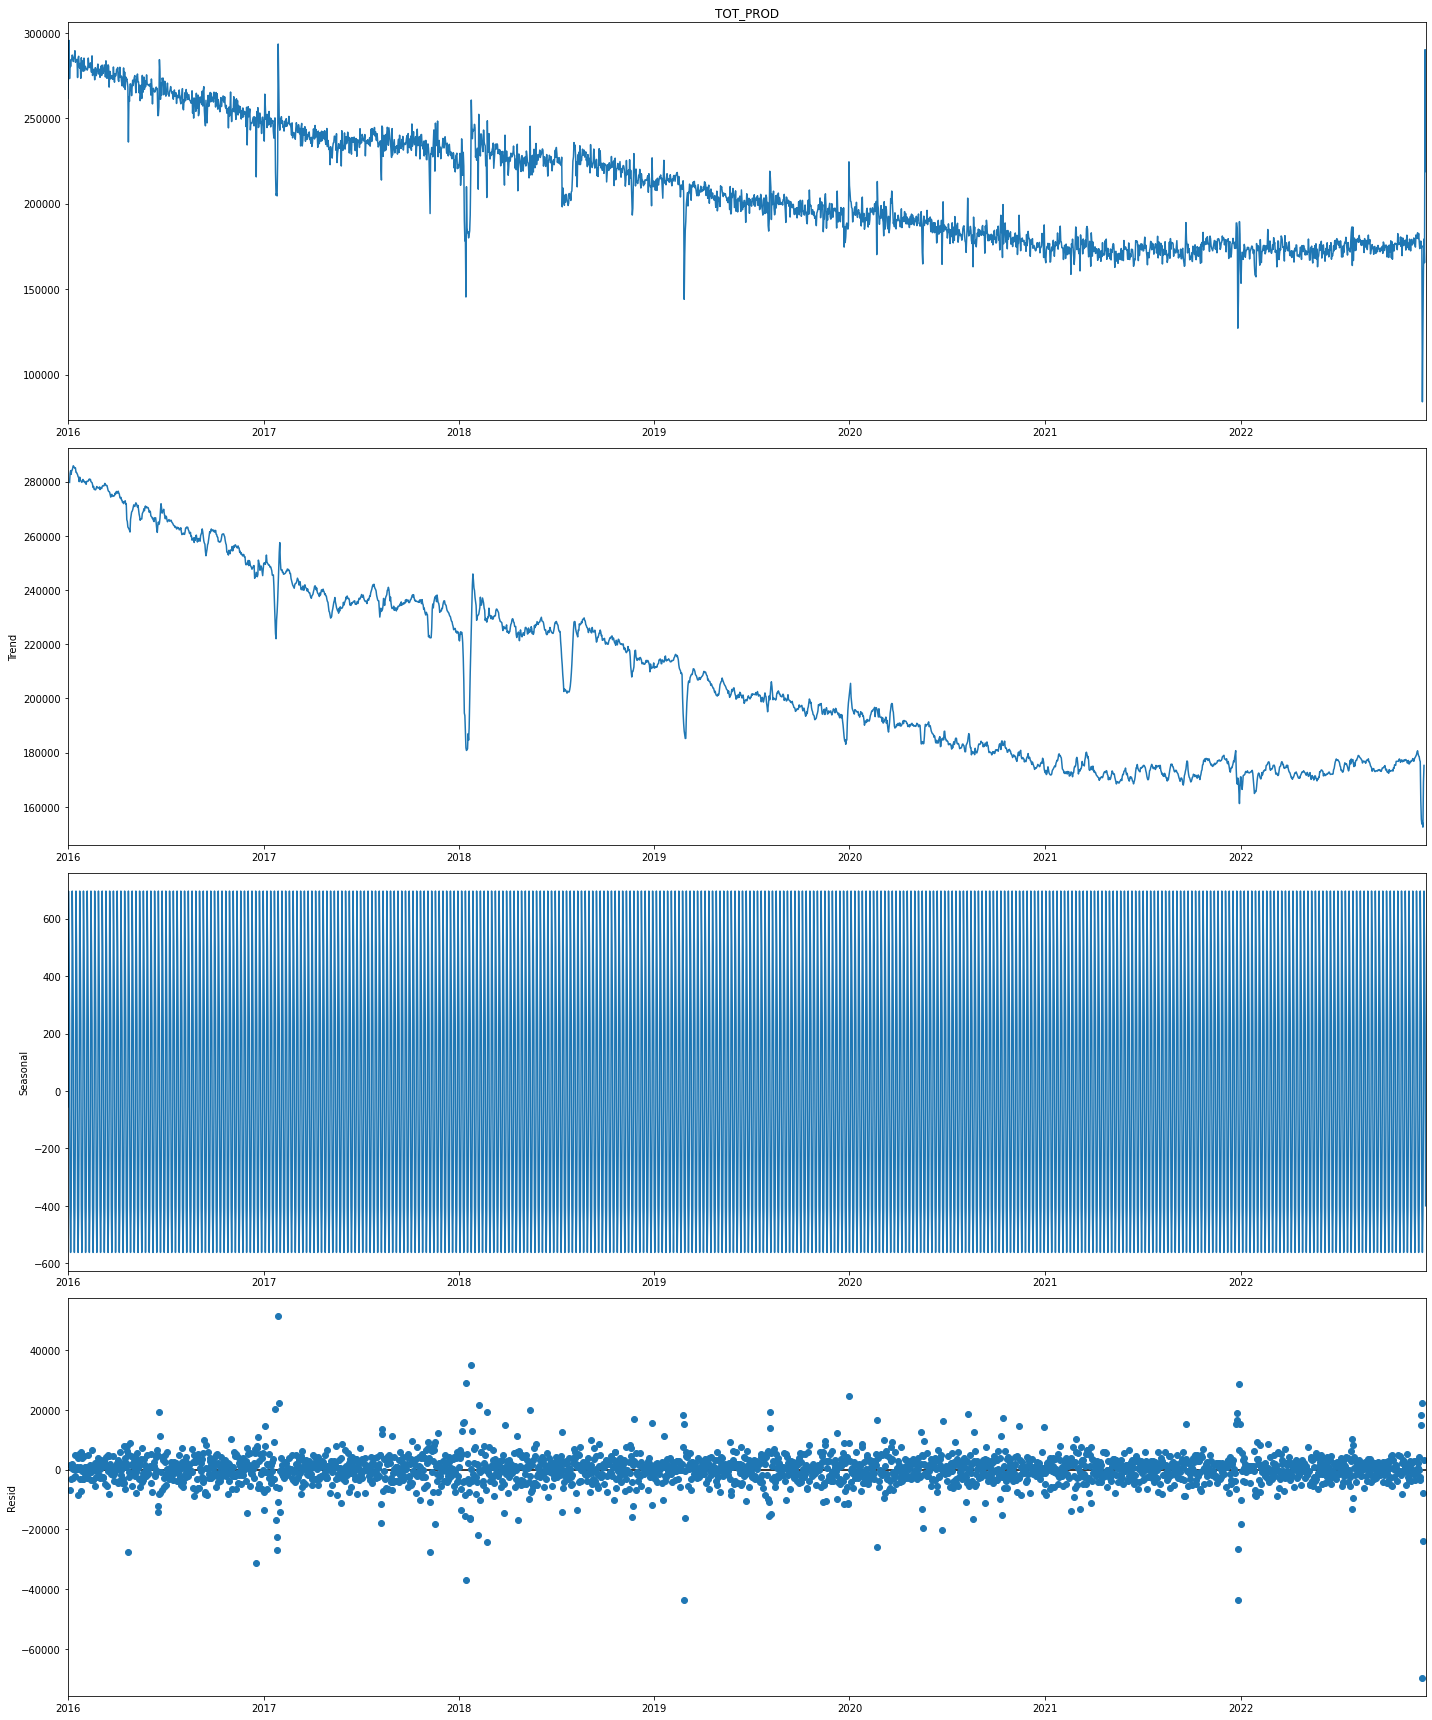

In [24]:
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(df.TOT_PROD, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

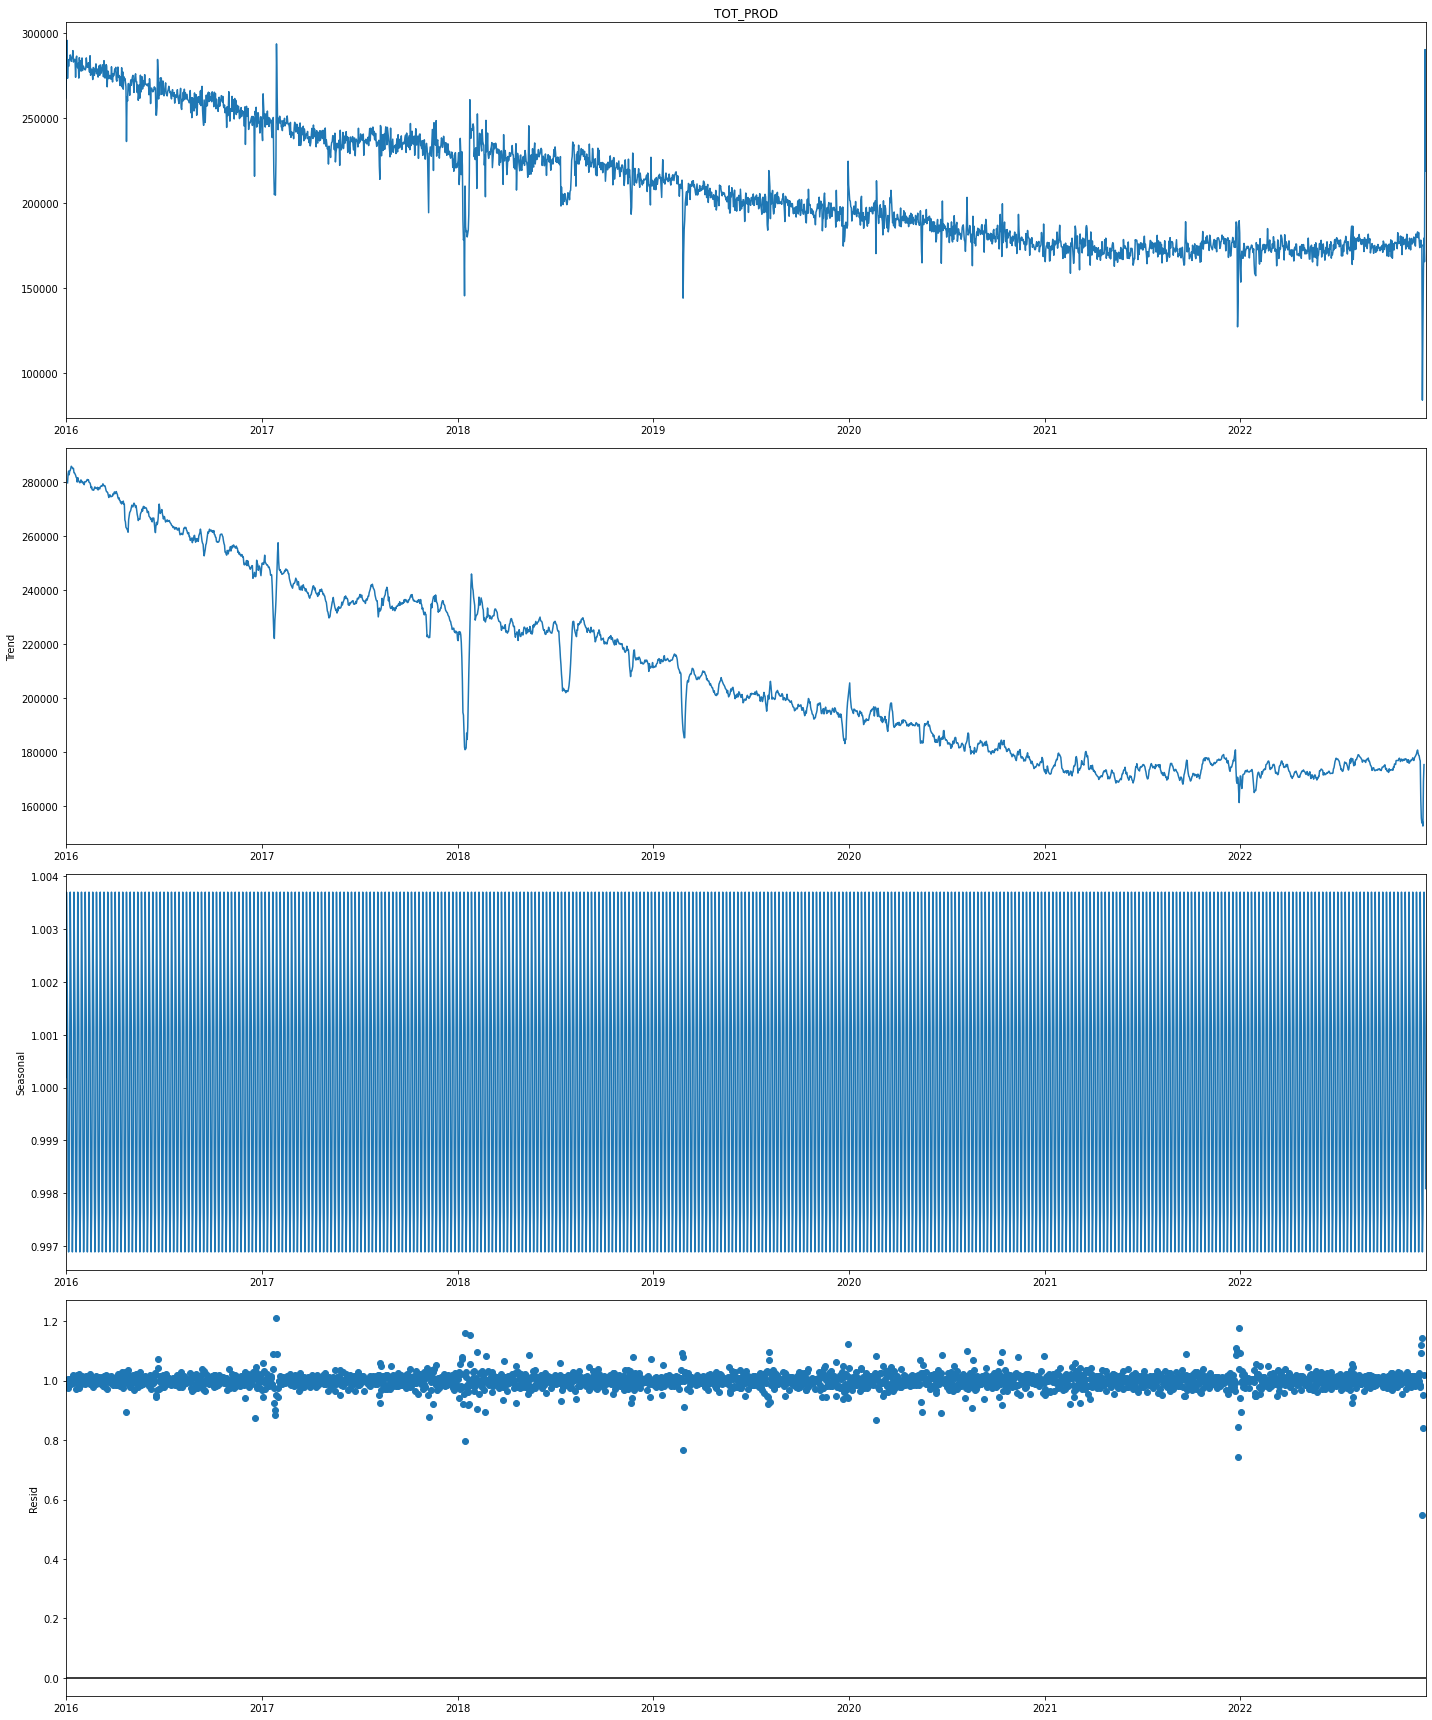

In [25]:
decomposition = sm.tsa.seasonal_decompose(df.TOT_PROD, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

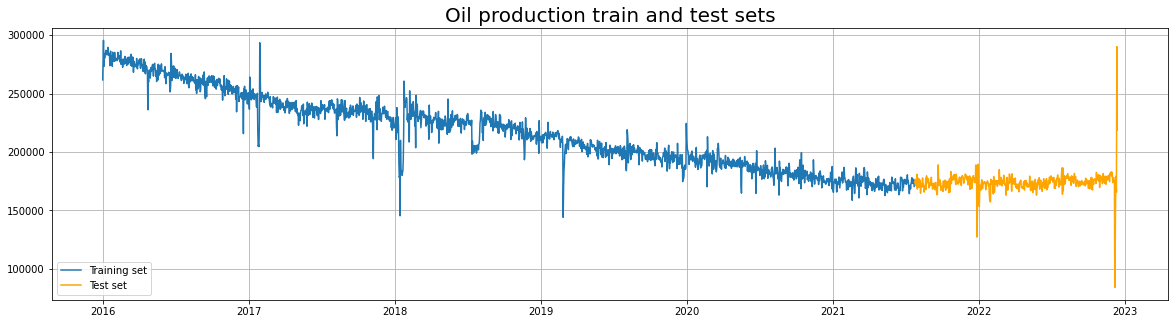

In [26]:
train_len = int(0.8*len(df['TOT_PROD']))
train = df['TOT_PROD'][0:train_len] 
test = df['TOT_PROD'][train_len:] 

plt.figure(figsize=(20,5))
plt.grid()
plt.title('Oil production train and test sets', size=20)
plt.plot(train, label='Training set')
plt.plot(test, label='Test set', color='orange')
plt.legend();

In [27]:
y_hat_sma = df.copy()
ma_window = 30
min_periods = 1
y_hat_sma['sma_forecast'] = test.rolling(ma_window, min_periods).mean()
#reference : https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

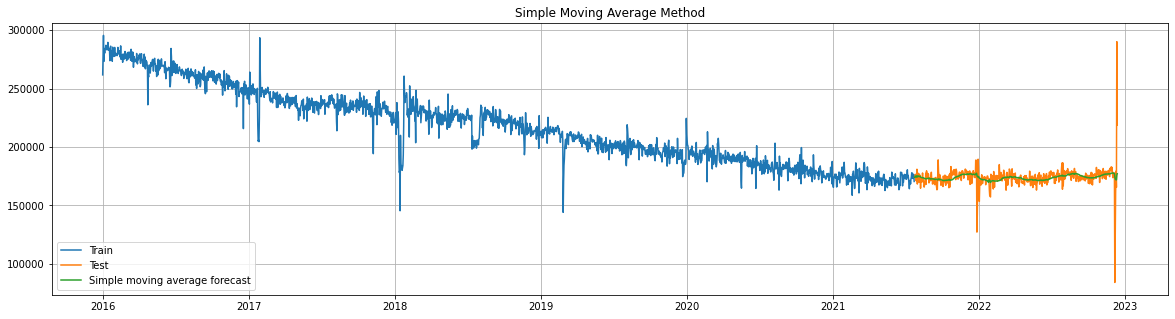

In [28]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [29]:
test#['TOT_PROD']

date
2021-07-24   174031.00
2021-07-25   174267.00
2021-07-26   176548.00
2021-07-27   175606.00
2021-07-28   171101.00
                ...   
2022-12-09   161032.00
2022-12-10   179321.00
2022-12-11   165433.00
2022-12-12   290095.09
2022-12-13   218847.79
Name: TOT_PROD, Length: 508, dtype: float64

In [30]:
y_pred = test.rolling(ma_window, min_periods).mean()

In [31]:
y_hat_sma.to_csv('y_hat_sma.csv')



In [32]:
y_pred.to_csv('y_pred_sma.csv')

SMA Scoring

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_sma = mean_absolute_error(test, y_pred)
mse_sma = mean_squared_error(test, y_pred, squared = True)
rmse_sma = mean_squared_error(test, y_pred, squared = False)
print(f'MAE_SMA: {mae_sma:.2f}')
print(f'MSE_SMA: {mse_sma:.2f}')
print(f'RMSE_SMA: {rmse_sma:.2f}')

MAE_SMA: 3853.04
MSE_SMA: 72784987.90
RMSE_SMA: 8531.41


### **SARIMAX**

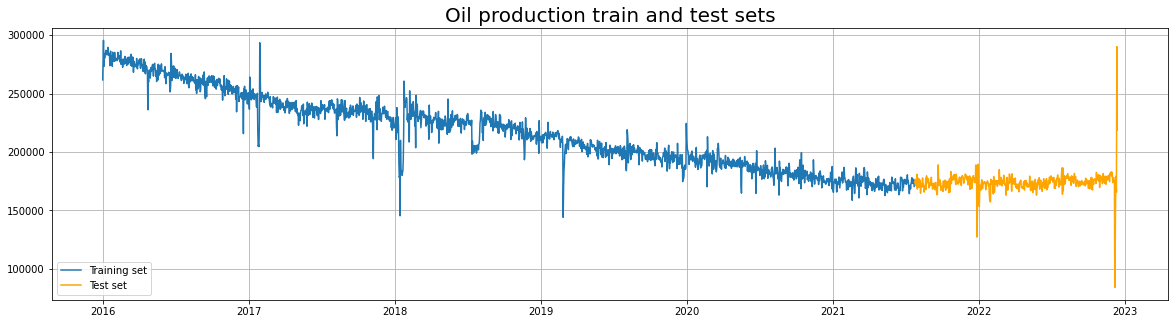

In [34]:
# Split the data into a training set and a test set
train_len = int(0.8*len(df))
train = df[:train_len]
test = df[train_len:]

plt.figure(figsize=(20,5))
plt.grid()
plt.title('Oil production train and test sets', size=20)
plt.plot(train['TOT_PROD'], label='Training set')
plt.plot(test['TOT_PROD'], label='Test set', color='orange')
plt.legend();



/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


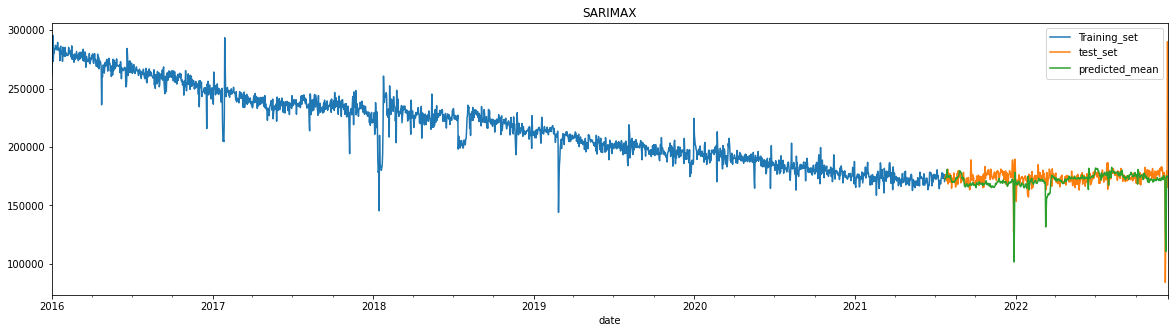

In [35]:
# Fit a SARIMA model to the training data
model = sm.tsa.SARIMAX(train['TOT_PROD'], order=(1,1,1), seasonal_order=(0,1,1,30), exog=train['HCO_PC_10'])
results = model.fit()

# Make predictions for the test set
predictions = results.predict(start=test['TOT_PROD'].index[0], end=test['TOT_PROD'].index[-1], exog=test['HCO_PC_10'], dynamic=False)

# Plot the forecasted values and the actual values
plt.figure(figsize=(20,5))
plt.grid()
train['TOT_PROD'].plot(label='Training_set')
test['TOT_PROD'].plot(label='test_set')
predictions.plot(label='predicted_mean')
plt.title('SARIMAX')
plt.legend(loc='best')
plt.show();

In [36]:
predictions.to_csv('forecast_sarimax.csv')

In [37]:
test.to_csv('data_sarimax.csv')

SARIMAX Score

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_sarimax = mean_absolute_error(test['TOT_PROD'], predictions)
mse_sarimax = mean_squared_error(test['TOT_PROD'], predictions, squared = True)
rmse_sarimax = mean_squared_error(test['TOT_PROD'], predictions, squared = False)
print(f'MAE_SARIMAX: {mae_sarimax:.2f}')
print(f'MSE_SARIMAX: {mse_sarimax:.2f}')
print(f'RMSE_SARIMAX: {rmse_sarimax:.2f}')

MAE_SARIMAX: 5280.83
MSE_SARIMAX: 82665659.26
RMSE_SARIMAX: 9092.07


# LGBM Multivariate

In [39]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import lightgbm as lgb

In [41]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
X_train, X_test = df.iloc[:train_size], df.iloc[train_size:]

# Extract the target variable (oil production)
y_train = X_train['TOT_PROD']
y_test = X_test['TOT_PROD']

# Drop the target variable from the training and test sets
X_train.drop(columns=['TOT_PROD'], inplace=True)
X_test.drop(columns=['TOT_PROD'], inplace=True)

# Convert data to LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Specify model parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train model
model = lgb.train(params, train_data, num_boost_round=200, valid_sets=[test_data], early_stopping_rounds=5)

[1]	valid_0's rmse: 42630.9
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's rmse: 40670
[3]	valid_0's rmse: 38875
[4]	valid_0's rmse: 37106
[5]	valid_0's rmse: 35480.7
[6]	valid_0's rmse: 33806.8
[7]	valid_0's rmse: 32409.9
[8]	valid_0's rmse: 31106.9
[9]	valid_0's rmse: 29818.6
[10]	valid_0's rmse: 28505.1
[11]	valid_0's rmse: 27468.2
[12]	valid_0's rmse: 26392.9
[13]	valid_0's rmse: 25369.6
[14]	valid_0's rmse: 24346.2
[15]	valid_0's rmse: 23579.6
[16]	valid_0's rmse: 22617.4
[17]	valid_0's rmse: 21597
[18]	valid_0's rmse: 20812.4
[19]	valid_0's rmse: 20072.7
[20]	valid_0's rmse: 19551.1
[21]	valid_0's rmse: 18916.6
[22]	valid_0's rmse: 18295.8
[23]	valid_0's rmse: 17702.4
[24]	valid_0's rmse: 17128.5
[25]	valid_0's rmse: 16588.4
[26]	valid_0's rmse: 16177.7
[27]	valid_0's rmse: 15735
[28]	valid_0's rmse: 15400
[29]	valid_0's rmse: 15154.7
[30]	valid_0's rmse: 14680.1
[31]	valid_0's rmse: 14369.6
[32]	valid_0's rmse: 14183.8
[33]	valid_0's rmse: 13931
[34]	

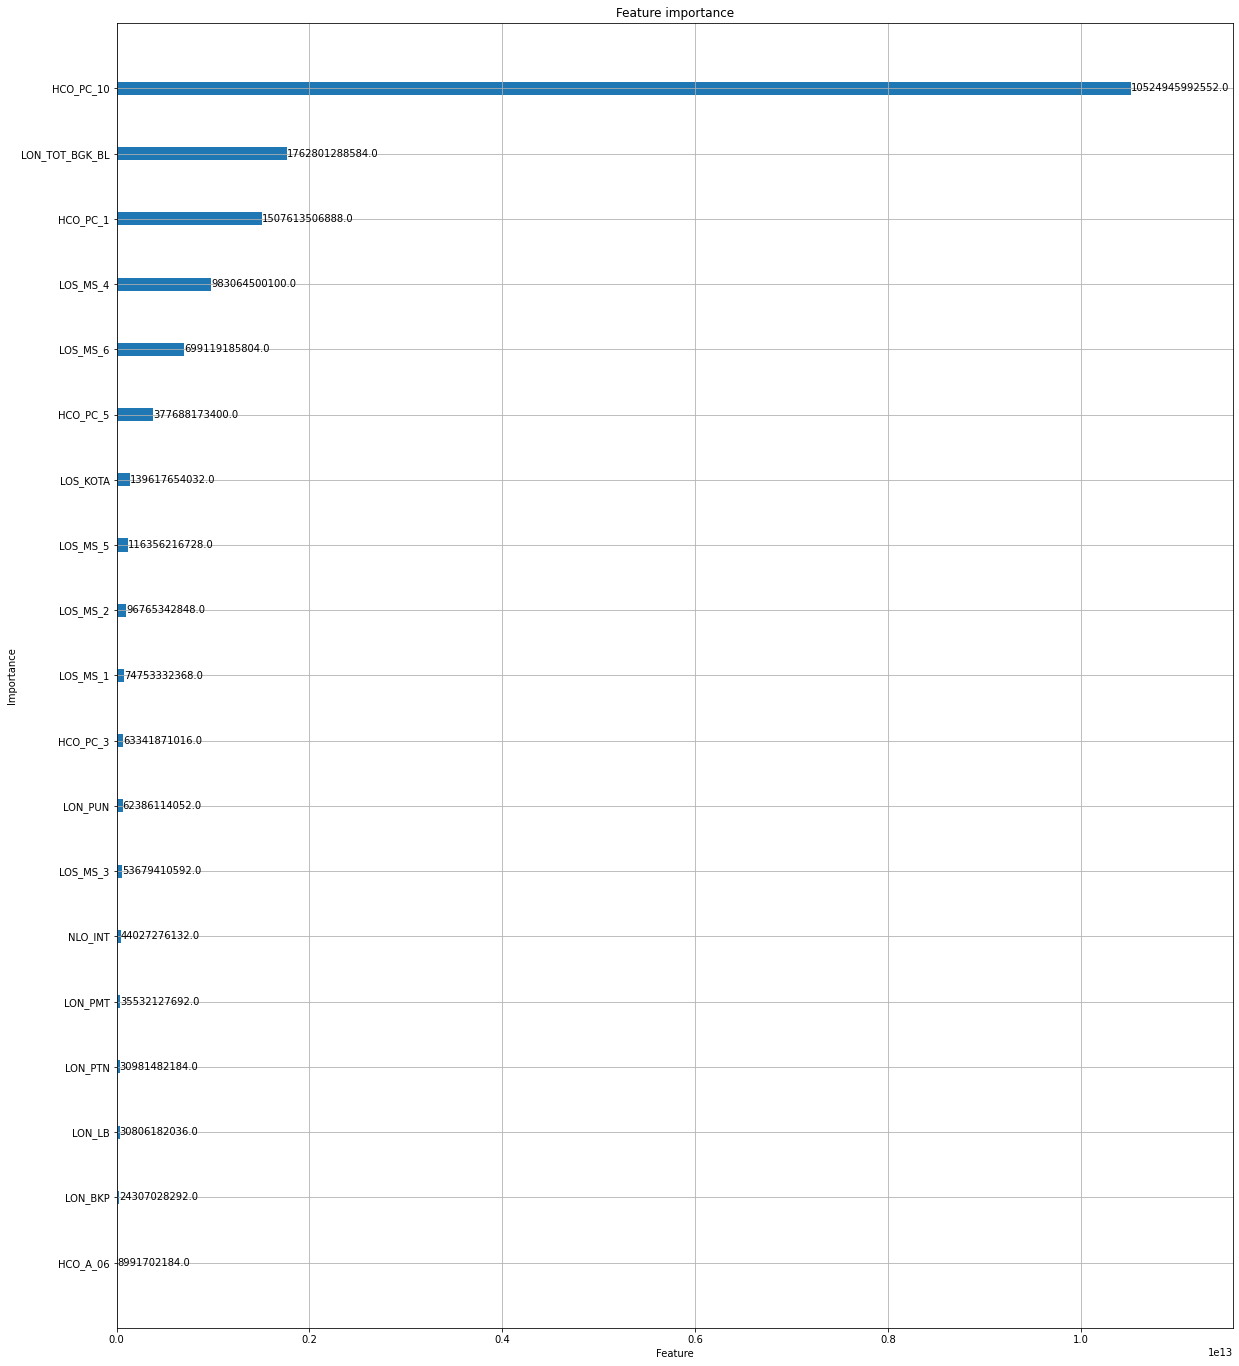

In [42]:
lgb.plot_importance(model, importance_type='gain', xlabel='Feature', ylabel='Importance')
plt.show()

In [43]:
# Make forecasts on test data
pred_lgbm = model.predict(X_test, num_iteration=model.best_iteration)

y_pred = pd.DataFrame(data = pred_lgbm, 
                  index = y_test.index, 
                  columns = ['y_pred'])

y_pred

,y_pred
date,
2021-07-24,173748.07
2021-07-25,172582.90
2021-07-26,175117.68
2021-07-27,175266.03
2021-07-28,175555.66
...,...
2022-12-09,159983.96
2022-12-10,173066.31
2022-12-11,173500.10


In [44]:
test_pred = pd.concat([y_train.rename('y_train'), y_test.rename('y_test'), y_pred], axis=1)
test_pred

,y_train,y_test,y_pred
date,,,
2016-01-01,261672.00,NaN,NaN
2016-01-02,279469.00,NaN,NaN
2016-01-03,295497.00,NaN,NaN
2016-01-04,273198.00,NaN,NaN
2016-01-05,284080.00,NaN,NaN
...,...,...,...
2022-12-09,NaN,161032.00,159983.96
2022-12-10,NaN,179321.00,173066.31
2022-12-11,NaN,165433.00,173500.10


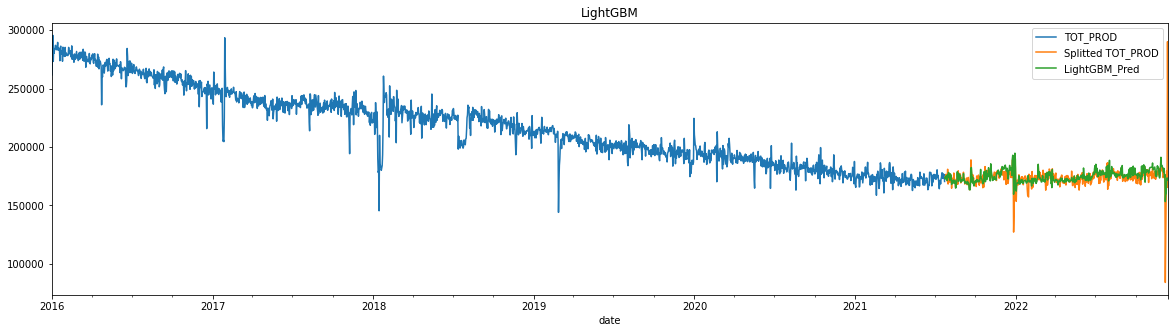

In [45]:
plt.figure(figsize=(20,5))
plt.grid()
test_pred['y_train'].plot(label='TOT_PROD')

#since the train & test input are all the production node other than TOT_PROD, 
#so this is just for visualizing splitted TOT_PROD data on forecasting period
test_pred['y_test'].plot(label='Splitted TOT_PROD') 

test_pred['y_pred'].plot(label='LightGBM_Pred')
plt.title('LightGBM')
plt.legend(loc='best')
plt.show();

In [46]:
y_test.describe()

count      508.00
mean    173958.04
std       8830.75
min      84057.00
25%     171451.00
50%     174136.50
75%     177128.00
max     290095.09
Name: TOT_PROD, dtype: float64

In [47]:
y_pred.describe()

,y_pred
count,508.00
mean,174914.35
std,5137.48
min,153214.70
25%,171298.89
50%,174341.54
75%,178038.21
max,194685.13


In [48]:
y_pred.to_csv('prediction_lgbm.csv')
pd.DataFrame(y_test).to_csv('test_lgbm.csv')

**LightGBM Score**

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_lgbm = mean_absolute_error(y_test, y_pred)
mse_lgbm = mean_squared_error(y_test, y_pred, squared = True)
rmse_lgbm = mean_squared_error(y_test, y_pred, squared = False)
print(f'MAE_LGBM: {mae_lgbm:.2f}')
print(f'MSE_LGBM: {mse_lgbm:.2f}')
print(f'RMSE_LGBM: {rmse_lgbm:.2f}')

MAE_LGBM: 3748.71
MSE_LGBM: 63058864.87
RMSE_LGBM: 7940.96


**SUMMARY SCORE**

In [50]:
# initialize list of lists
score = ['SMA', mae_sma, mse_sma, rmse_sma ], ['SARIMAX', mae_sarimax, mse_sarimax, rmse_sarimax], ['LightGBM', mae_lgbm, mse_lgbm, rmse_lgbm ]
  
# Create the pandas DataFrame
score_data = pd.DataFrame(score, columns=['Method', 'MAE', 'MSE', 'RMSE'])
  
# print dataframe.
score_data



,Method,MAE,MSE,RMSE
0,SMA,3853.04,72784987.90,8531.41
1,SARIMAX,5280.83,82665659.26,9092.07
2,LightGBM,3748.71,63058864.87,7940.96


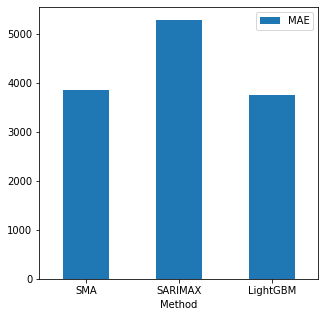

In [51]:
mae_bar = score_data.plot.bar(x='Method', y='MAE', rot=0, figsize=(5,5))

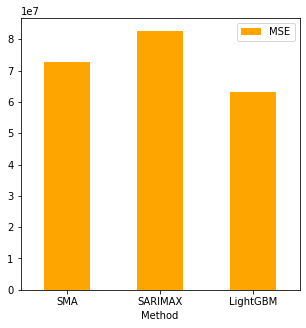

In [52]:
mse_bar = score_data.plot.bar(x='Method', y='MSE', rot=0, color = 'orange', figsize=(5,5))

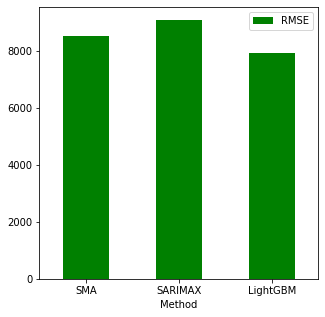

In [53]:
rmse_bar = score_data.plot.bar(x='Method', y='RMSE', rot=0, color = 'green', figsize=(5,5))